In [2]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [3]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-lT')],
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-lT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)

mc = load_case(json_files_mc[0])
alg1 = load_case(json_files_alg1[0])

# Files

MC:  ['mc-lT.json']
A1:  ['a1-lT.json']


## mc-lT.json

Temperature: 0.5


## a1-lT.json

Temperature: 0.5


Generating theoretical configurations: 100%|█| 16/16 [00:00<00:00, 16001.16it/s


[99799.1155277454, 200.87324134370309, 0.011230910902742353]


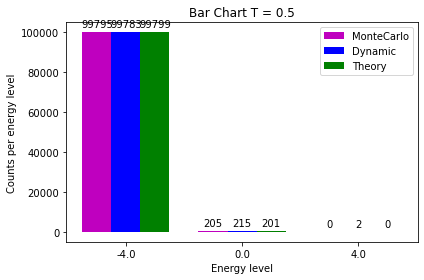

In [4]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_engy)
multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, multinom_avg, theory_engy, multinom_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

[99799.1155277454, 200.87324134370309, 0.011230910902742353]


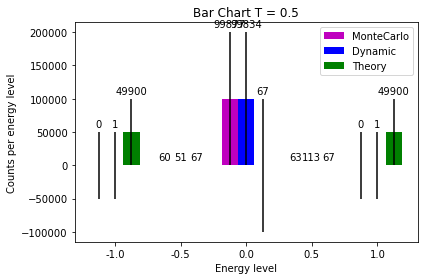

In [5]:
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_m)
multiplicity_mc, std_mc, mc_m_counts = std_algorithms(mc_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg1, std_alg1, alg1_m_counts = std_algorithms(alg1_m_counts, multinom_avg, theory_m, multinom_std)

fig, ax = plt.subplots()
labels = mc_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_m_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_m_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects3 = ax.bar(x + width * 2, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

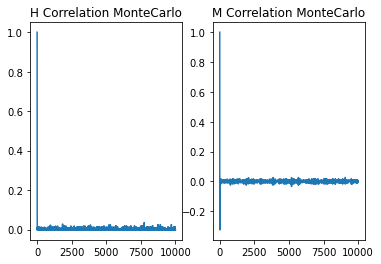

In [6]:
mc_engy_corr = acrl(mc["energy_sample"], 10000)
mc_m_corr = acrl(mc["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

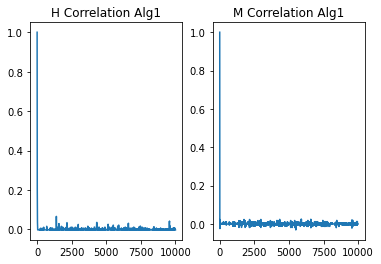

In [7]:
alg1_engy_corr = acrl(alg1["energy_sample"], 10000)
alg1_m_corr = acrl(alg1["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [8]:
display(Markdown('# Reject lack of fit iif distance < upper bound'))
display(Markdown('# H0: distance >= eps, Ha: dist < eps'))
print(f'Energy MC - Theory:', theoretical_test(f_obs=list(mc_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization MC - Theory:', theoretical_test(f_obs=list(mc_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))
print(f'Energy Alg1 - Theory:', theoretical_test(f_obs=list(alg1_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization Alg1 - Theory:', theoretical_test(f_obs=list(alg1_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))

# Reject lack of fit iif distance < upper bound

# H0: distance >= eps, Ha: dist < eps

Energy MC - Theory: {'Distance': 3.3967831763808723e-09, 'Upper_bound': 0.0024999612174576437, 'pvalue': 0.0}
Magnetization MC - Theory: {'Distance': 1.494197408674166, 'Upper_bound': 0.0021360511669020815, 'pvalue': 2.368217485728823e-22}
Energy Alg1 - Theory: {'Distance': 4.632307471356778e-08, 'Upper_bound': 0.0024998540370003257, 'pvalue': 0.0}
Magnetization Alg1 - Theory: {'Distance': 1.4933194987307452, 'Upper_bound': 0.0020744286973909303, 'pvalue': 5.384239163226157e-16}


In [18]:
from lrtest import *
display(Markdown('# H0: the sample comes from the theoretical distribution'))
print(f'Energy MC:', one_sample_test(theory_engy[:,1], list(mc_engy_counts.values())))
print(f'Magnetization MC:', one_sample_test(theory_m[:,1], list(mc_m_counts.values())))
print(f'Energy alg1:', one_sample_test(theory_engy[:,1], list(alg1_engy_counts.values())))
print(f'Magnetization alg1:', one_sample_test(theory_m[:,1], list(alg1_m_counts.values())))

# H0: the sample comes from the theoretical distribution

Energy MC: 0.9936761294582044
Magnetization MC: 0.0
Energy alg1: 0.3490637646731411
Magnetization alg1: 0.0


In [16]:
display(Markdown('# H0: the two samples came from the same distribution'))
print(f'Energy:', z_test(f1=list(mc_engy_counts.values()), f2=list(alg1_engy_counts.values()), n_samples=len(mc["energy_sample"])))
print(f'Magnetization:', z_test(f1=list(mc_m_counts.values()), f2=list(alg1_m_counts.values()), n_samples=len(mc["energy_sample"])))

# H0: the two samples came from the same distribution

Energy: 0.9999999999999966
Magnetization: 0.9999999999999815
